In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
labels.head()

file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17

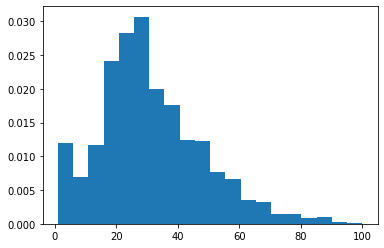

In [5]:
#labels.plot(x=labels['real_age'],y=labels.index kind='hist')
plt.hist(labels['real_age'], bins=20, density=True);

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(dataframe=labels, 
                                                   directory='/datasets/faces/final_files/', 
                                                   x_col='file_name', 
                                                   y_col='real_age', 
                                                   target_size=(224,224), batch_size=32, class_mode='raw', 
                                                   seed=12345)

Found 7591 validated image filenames.


(32, 224, 224, 3)


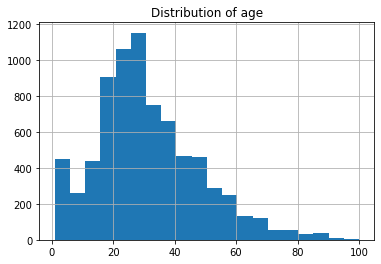

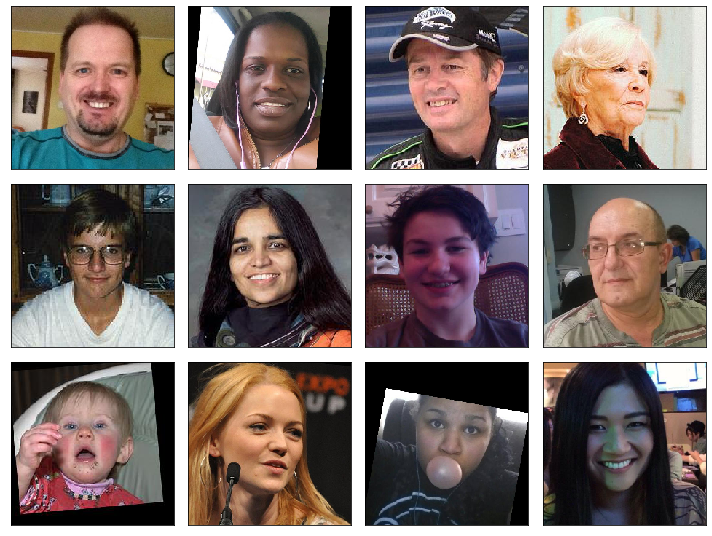

In [7]:
features, target = next(train_gen_flow)

print(features.shape)

labels['real_age'].hist(bins = 20);
plt.title('Distribution of age');

fig = plt.figure(figsize=(10,10))

for i in range(12):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()